In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
# The number of neurons
num_neurons = np.power(10, 2)

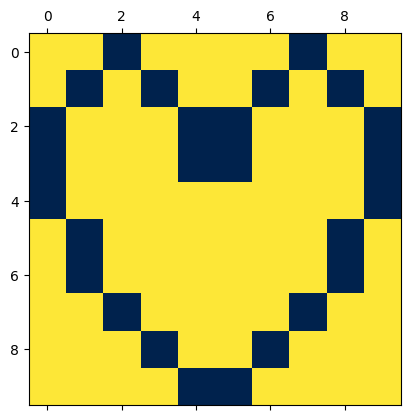

In [20]:
# Image shape
img_shape = (10, 10)
# Load image to be memorized
img_data = np.loadtxt('heart.csv', delimiter=',')
img_arr = img_data.flatten()
# Show the image
plt.matshow(img_data, cmap='cividis')

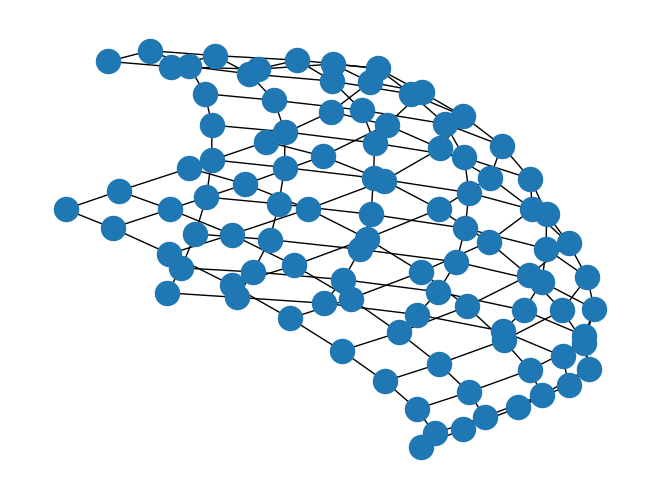

In [195]:
# Connect the neurons in a graph
# TODO
#    Choose a graph type
graph_type = 'grid'
if graph_type == 'grid':
    neural_network = nx.grid_graph(dim=(10, 10))
elif graph_type == 'e-r':
    # p: The probability of edge
    neural_network = nx.fast_gnp_random_graph(n=num_neurons, p=0.1)
elif graph_type == 'n-w-s':
    # k: Each node is joined with its k nearest neighbors
    # p: The probability of edge
    neural_network = nx.newman_watts_strogatz_graph(n=num_neurons, k=4, p=0.1)
elif graph_type == 'b-a':
    # m: Number of edges to attach from a new node to existing nodes
    neural_network = nx.barabasi_albert_graph(n=num_neurons, m=3)
elif graph_type == 'cycle':
    neural_network = nx.cycle_graph(n=num_neurons)
elif graph_type == 'path':
    neural_network = nx.path_graph(n=num_neurons)
elif graph_type == 'star':
    neural_network = nx.star_graph(n=num_neurons-1)
nx.draw(neural_network, pos=nx.spring_layout(neural_network))

# Training
W = np.matmul(img_arr[:, np.newaxis], img_arr[np.newaxis, :])
np.fill_diagonal(W, 0)
W = np.multiply(W, nx.adjacency_matrix(neural_network).toarray())
W = W / (np.asarray(list(dict(neural_network.degree()).values()))[:, np.newaxis] + 1)

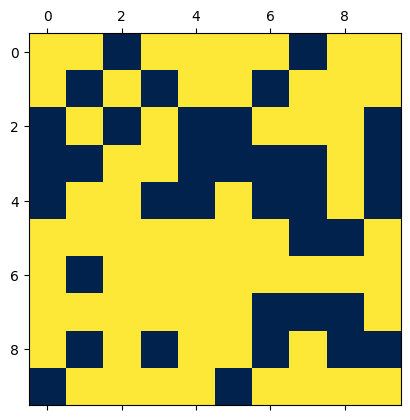

In [198]:
# Add noise to the image
# TODO
#    Determine noise ratio
noise_ratio = 0.2
noise_idx = np.random.choice(range(len(img_arr)), np.floor(len(img_arr) * noise_ratio).astype(int), replace=False)
noise_arr = np.asarray([(-1 if img_arr[i] > 0 else 1) if i in noise_idx else 0 for i in range(len(img_arr))])
noisey_img_arr = np.asarray([(-1 if img_arr[i] > 0 else 1) if i in noise_idx else img_arr[i] for i in range(len(img_arr))])
# Show the noisy image
plt.matshow(noisey_img_arr.reshape(10, 10), cmap='cividis')

In [146]:
def inference(input_arr):
    rec_arr = input_arr
    # Iteratively recall the image
    for i in range(100):
        rec_arr = np.matmul(W, rec_arr)
        rec_arr = np.where(rec_arr >= 0, 1, rec_arr)
        rec_arr = np.where(rec_arr < 0, -1, rec_arr)
        if (rec_arr == img_arr).all():
            print('Recovered at the %s th step.' % (i+1))
            break
    # Recover the image
    rec_data = rec_arr.reshape(img_shape)
    return rec_data

Recovered at the 3 th step.


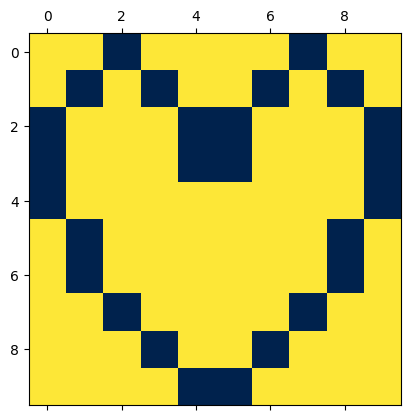

In [199]:
# Inference
rec_data = inference(noisey_img_arr)
# Show the recovered image
plt.matshow(rec_data, cmap='cividis')